In [5]:
library("data.table")
library("qtl")

# inputs

In [2]:
genfile =  '../data/20200727_all_wscomposite_binsize1mb_3mbxo_3mbfill.csv'
phefile = '../data/20200727_intersection_phenotypes.csv'

In [3]:
datf2 <- read.cross(format = "csvs",
                    genotypes = c(-1,0,1,"C","D"),
                    dir='.',
                    genfile=genfile,
                    phefile = phefile )

Warning message in read.cross.csvs(dir, genfile, phefile, na.strings, genotypes, :
“2 individuals with genotypes but no phenotypes
    913407|910907
”

 --Read the following data:
	 3135  individuals
	 1088  markers
	 7  phenotypes
 --Cross type: f2 


In [4]:
summary(datf2)

    F2 intercross

    No. individuals:    3135 

    No. phenotypes:     7 
    Percent phenotyped: 100 99.9 98 98 99.9 99.9 99.9 

    No. chromosomes:    30 
        Autosomes:      1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 
                        23 24 25 26 27 28 29 30 

    Total markers:      1088 
    No. markers:        199 151 112 93 84 61 38 38 32 26 23 22 22 21 18 15 15 13 
                        12 12 10 9 8 8 8 8 8 8 7 7 
    Percent genotyped:  70.8 
    Genotypes (%):      AA:26.7  AB:46.9  BB:26.4  not BB:0.0  not AA:0.0 

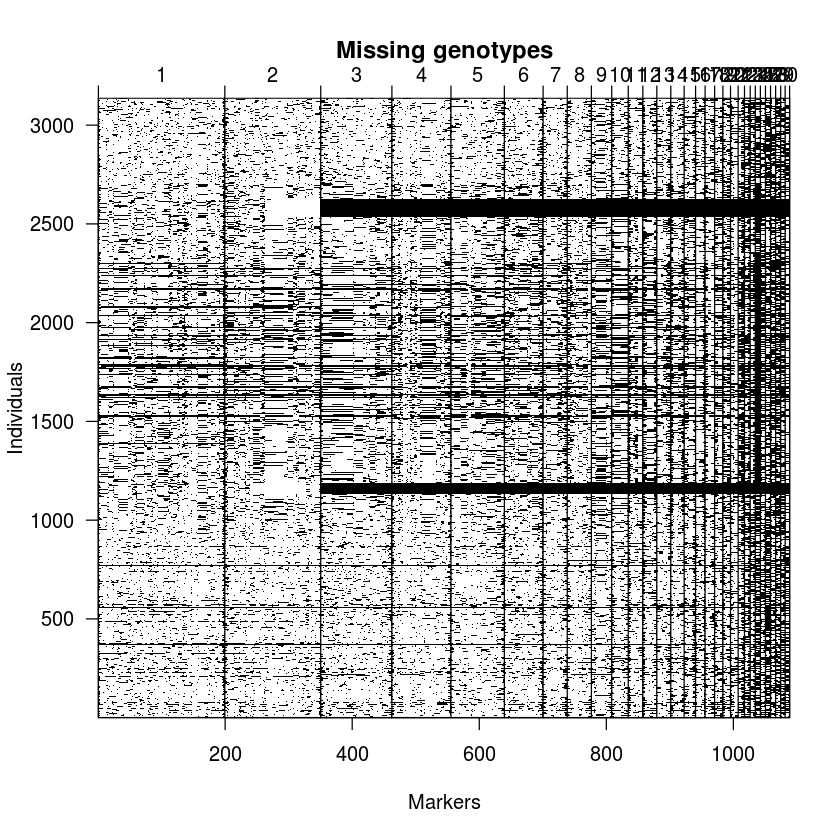

In [5]:
plotMissing(datf2)

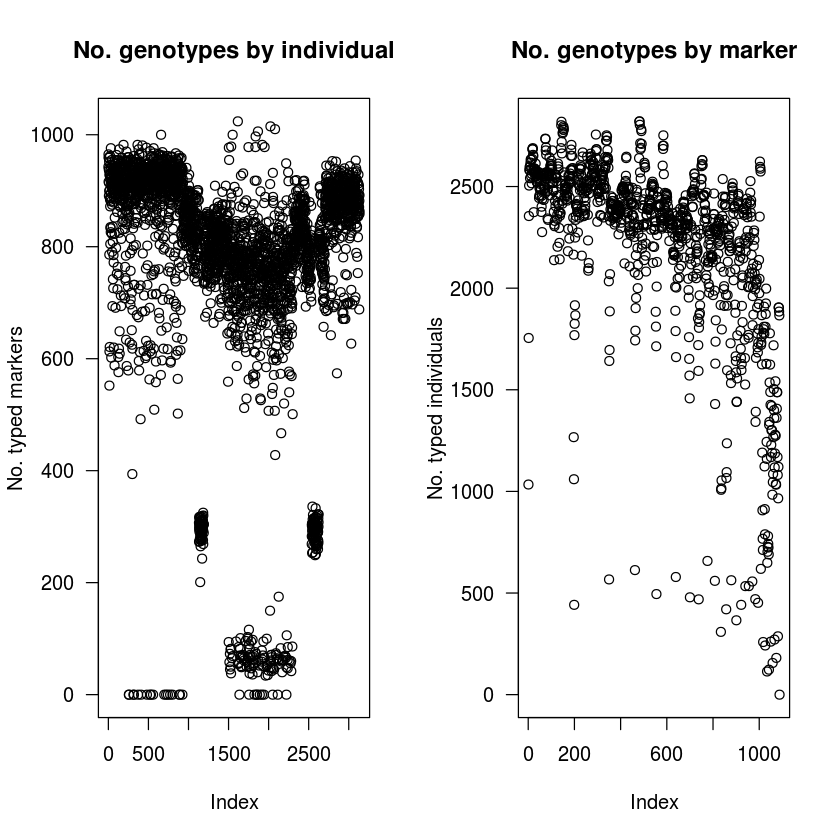

In [6]:
par(mfrow=c(1,2), las=1)
plot(ntyped(datf2), ylab="No. typed markers", main="No. genotypes by individual")
plot(ntyped(datf2, "mar"), ylab="No. typed individuals", main="No. genotypes by marker")

In [7]:
nt.bymar <- ntyped(datf2, "mar")
todrop <- names(nt.bymar[nt.bymar < 500])


In [8]:
todrop

[1] "1-198" "4-92"  "6-60"  "7-37"  "10-25" "11-22" "13-21" "14-20" "18-12"
[10] "19-11" "21-9"  "22-8"  "23-7"  "24-7"  "25-7"  "26-7"  "27-7"  "28-7" 
[19] "29-6"  "30-6"

In [9]:
datf2.1 <- drop.markers(datf2, todrop)

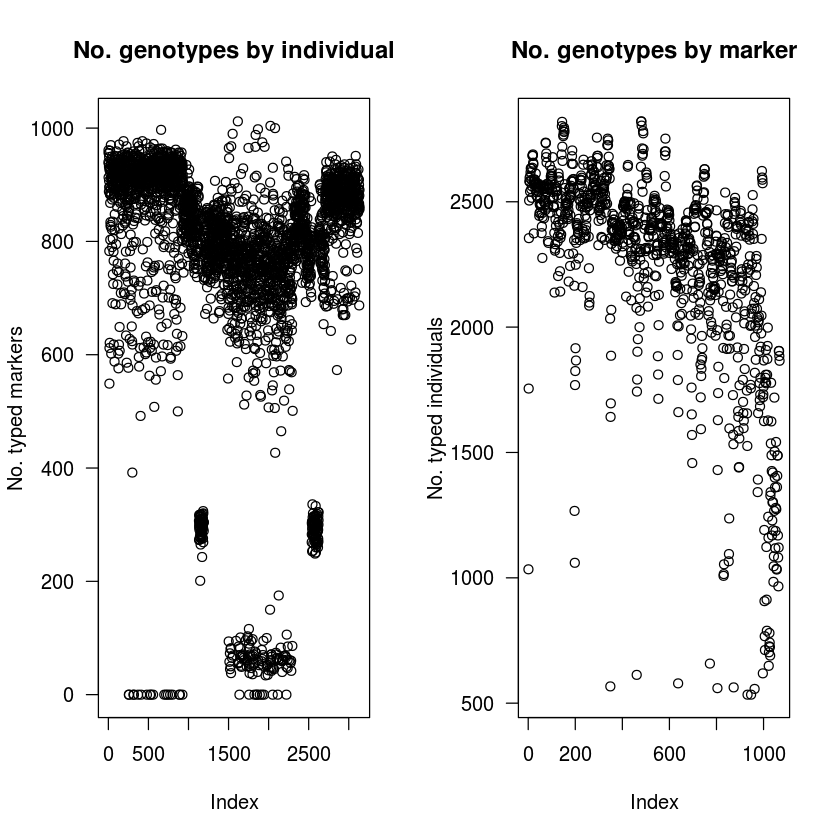

In [10]:
par(mfrow=c(1,2), las=1)
plot(ntyped(datf2.1), ylab="No. typed markers", main="No. genotypes by individual") 
plot(ntyped(datf2.1, "mar"), ylab="No. typed individuals",main="No. genotypes by marker")

In [11]:
datf2.2 <- subset(datf2.1, ind=(ntyped(datf2.1)>50)) # removing all individuals that have less than 5% of all markers


In [12]:
length(ntyped(datf2.1, "ind"))
length(ntyped(datf2.2, "ind"))

[1] 3135

[1] 3084

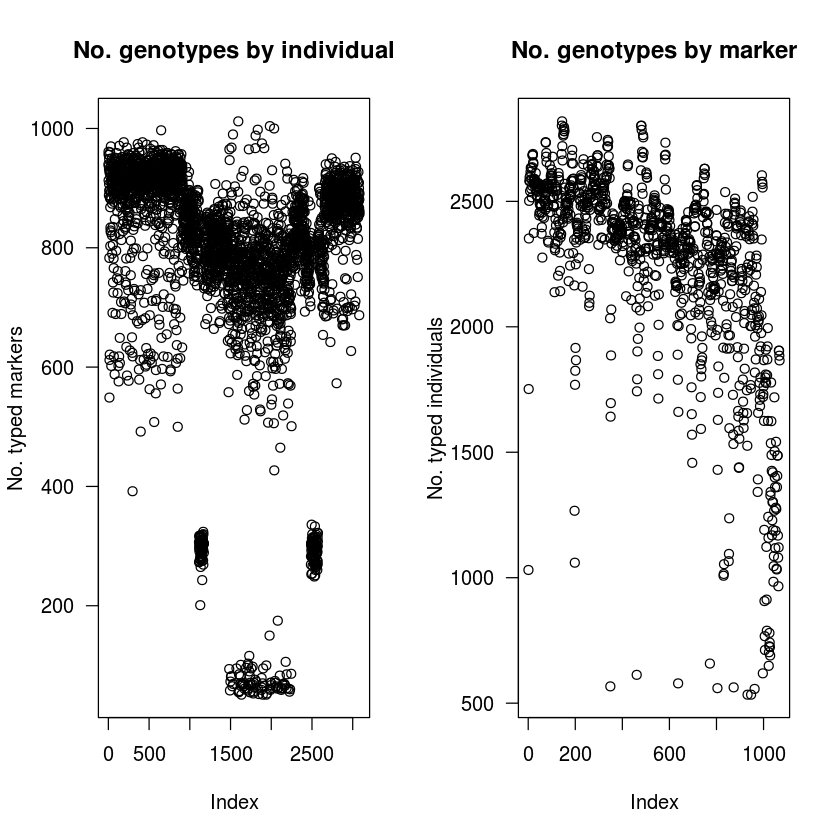

In [13]:
par(mfrow=c(1,2), las=1)
plot(ntyped(datf2.2), ylab="No. typed markers", main="No. genotypes by individual") 
plot(ntyped(datf2.2, "mar"), ylab="No. typed individuals",main="No. genotypes by marker")

In [14]:
summary(datf2.2)

    F2 intercross

    No. individuals:    3084 

    No. phenotypes:     7 
    Percent phenotyped: 100 99.9 98 98 99.9 99.9 99.9 

    No. chromosomes:    30 
        Autosomes:      1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 
                        23 24 25 26 27 28 29 30 

    Total markers:      1068 
    No. markers:        198 151 112 92 84 60 37 38 32 25 22 22 21 20 18 15 15 12 
                        11 12 9 8 7 7 7 7 7 7 6 6 
    Percent genotyped:  73.1 
    Genotypes (%):      AA:26.7  AB:46.9  BB:26.4  not BB:0.0  not AA:0.0 

In [15]:
cg <- comparegeno(datf2.2)

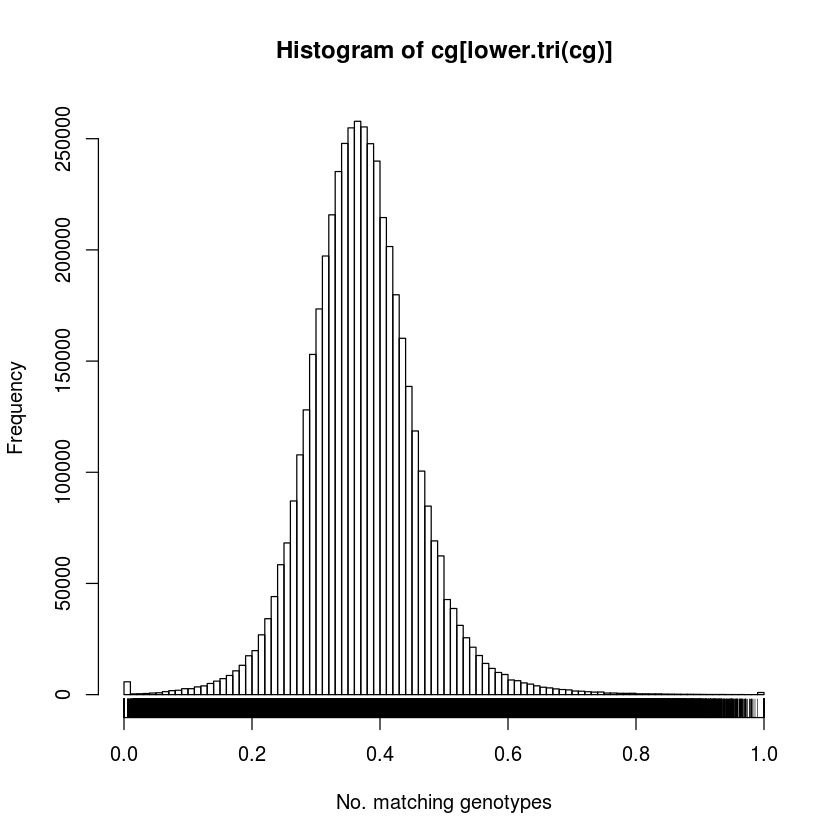

In [16]:
hist(cg[lower.tri(cg)], breaks=seq(0, 1, len=101), xlab="No. matching genotypes") 
rug(cg[lower.tri(cg)])

In [17]:
wh <- which(cg > 0.9, arr=TRUE)
wh <- wh[wh[,1] < wh[,2],]

In [18]:
wh

row,col
364,529
508,529
7,672
112,672
364,672
529,672
529,836
672,836
679,836
529,859


In [19]:
print(dup <- findDupMarkers(datf2.2, exact.only=FALSE))

$`1-3`
[1] "1-0" "1-1" "1-2"

$`1-194`
[1] "1-195" "1-196" "1-197"

$`2-3`
[1] "2-0" "2-1" "2-2"

$`2-146`
[1] "2-147" "2-148" "2-149" "2-150"

$`3-3`
[1] "3-0" "3-1" "3-2"

$`3-107`
[1] "3-108" "3-109" "3-110" "3-111"

$`4-3`
[1] "4-0" "4-1" "4-2"

$`4-55`
[1] "4-56"

$`4-88`
[1] "4-89" "4-90" "4-91"

$`5-3`
[1] "5-0" "5-1" "5-2"

$`5-8`
[1] "5-9"

$`5-79`
[1] "5-80" "5-81" "5-82"

$`6-3`
[1] "5-83" "6-0"  "6-1"  "6-2" 

$`6-56`
[1] "6-57" "6-58" "6-59"

$`7-3`
[1] "7-0" "7-1" "7-2"

$`7-7`
[1] "7-8"

$`7-33`
[1] "7-34" "7-35" "7-36"

$`8-3`
[1] "8-0" "8-1" "8-2"

$`8-33`
[1] "8-34" "8-35" "8-36" "8-37"

$`9-3`
[1] "9-0" "9-1" "9-2"

$`9-19`
[1] "9-18"

$`9-27`
[1] "9-28" "9-29" "9-30" "9-31"

$`10-3`
[1] "10-0" "10-1" "10-2"

$`10-21`
[1] "10-22" "10-23" "10-24"

$`11-3`
[1] "11-0" "11-1" "11-2"

$`11-18`
[1] "11-19" "11-20" "11-21"

$`12-3`
[1] "12-0" "12-1" "12-2"

$`12-17`
[1] "12-18" "12-19" "12-20"

$`13-3`
[1] "12-21" "13-0"  "13-1"  "13-2" 

$`13-17`
[1] "13-18" "13-19" "13-20

In [20]:
gt <- geno.table(datf2.2)

Warning message in getsex(cross):
“3 individuals with missing sex; assuming they're female”

In [21]:
gt[gt$P.value < 0.05/totmar(datf2.2),]
todrop <- rownames(gt[gt$P.value < 0.05/totmar(datf2.2),])
datf2.3 <- drop.markers(datf2.2, todrop)

,chr,missing,AA,AB,BB,not.BB,not.AA,P.value
1-0,1,2053,136,607,288,0,0,1.638215e-17
1-1,1,1332,279,907,566,0,0,1.275050e-21
1-2,1,732,417,1154,781,0,0,2.269885e-25
1-3,1,582,453,1235,814,0,0,1.950509e-23
1-4,1,503,500,1275,806,0,0,1.456785e-16
1-5,1,488,502,1293,801,0,0,1.084951e-15
1-6,1,503,504,1281,796,0,0,4.193705e-15
1-7,1,543,501,1260,780,0,0,4.551296e-14
1-8,1,481,536,1281,786,0,0,2.704136e-11
1-9,1,466,543,1289,786,0,0,1.179712e-10


In [22]:
length(todrop)

[1] 679

In [23]:
datf2.3 <- datf2.2

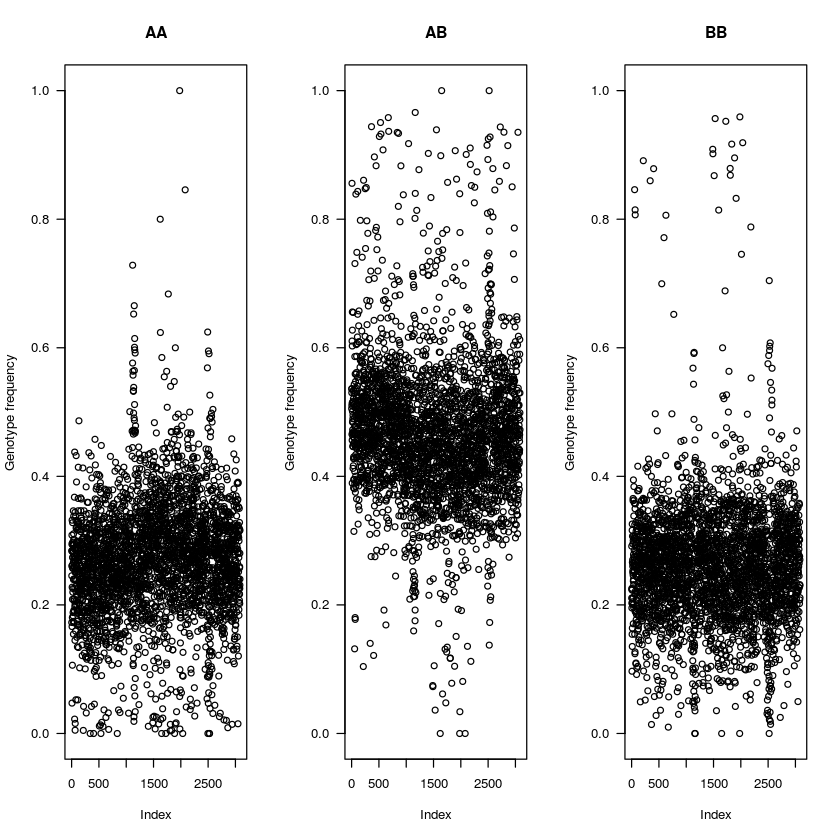

In [24]:
g <- pull.geno(datf2.2)
gfreq <- apply(g, 1, function(a) table(factor(a, levels=1:3)))
gfreq <- t(t(gfreq) / colSums(gfreq))
par(mfrow=c(1,3), las=1)
for(i in 1:3) plot(gfreq[i,], ylab="Genotype frequency", main=c("AA", "AB", "BB")[i], ylim=c(0,1))

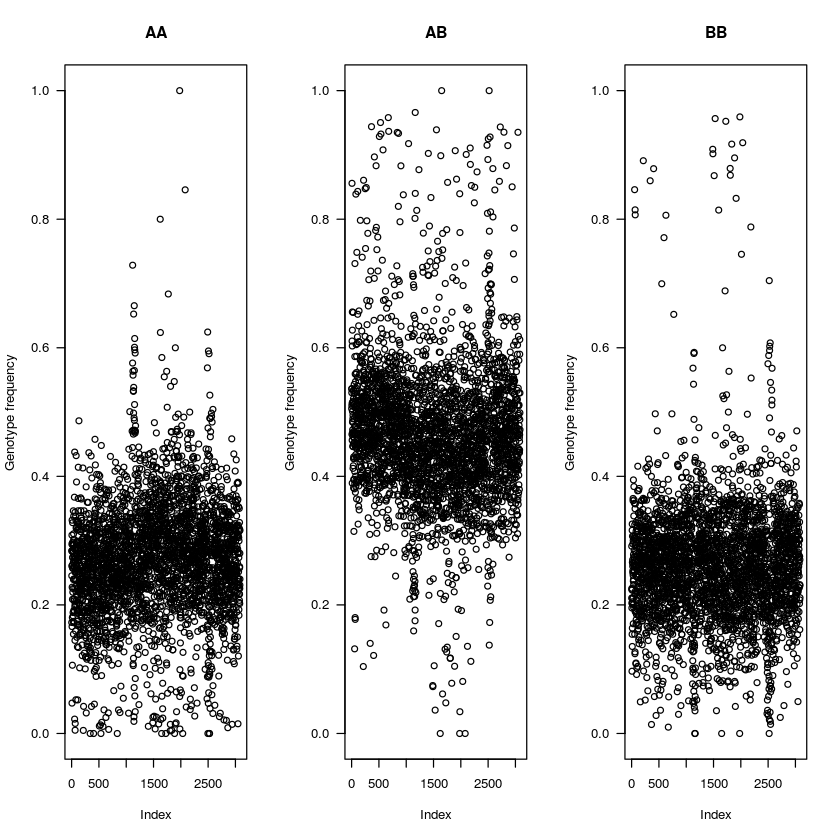

In [25]:
g <- pull.geno(datf2.3)
gfreq <- apply(g, 1, function(a) table(factor(a, levels=1:3)))
gfreq <- t(t(gfreq) / colSums(gfreq))
par(mfrow=c(1,3), las=1)
for(i in 1:3) plot(gfreq[i,], ylab="Genotype frequency", main=c("AA", "AB", "BB")[i], ylim=c(0,1))

In [26]:
id_gtfreq <- which(gfreq[1,]<0.5 & gfreq[2,]<0.65 & gfreq[2,]>0.35 & gfreq[3,]<0.5)

In [27]:
datf2.4 <- subset(datf2.3, ind=(id_gtfreq))

In [28]:
datf2.4 <- datf2.3

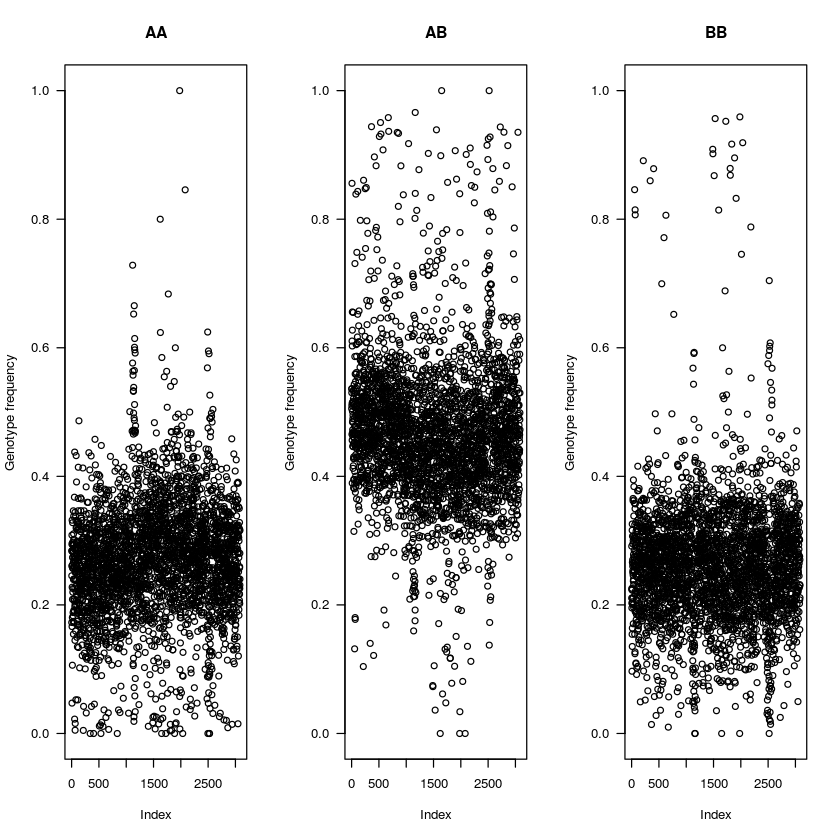

In [29]:
g <- pull.geno(datf2.4)
gfreq <- apply(g, 1, function(a) table(factor(a, levels=1:3)))
gfreq <- t(t(gfreq) / colSums(gfreq))
par(mfrow=c(1,3), las=1)
for(i in 1:3) plot(gfreq[i,], ylab="Genotype frequency", main=c("AA", "AB", "BB")[i], ylim=c(0,1))

In [30]:
datf2.4 <- est.rf(datf2.4)
datf2.4_tst <- markerlrt(datf2.4)

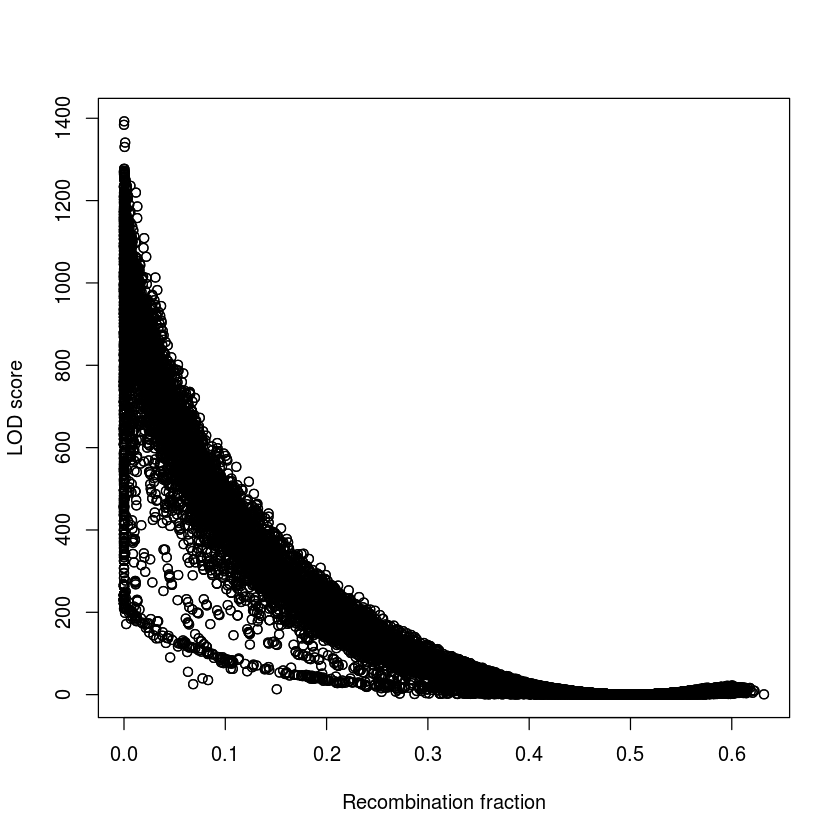

In [31]:
rf <- pull.rf(datf2.4)
lod <- pull.rf(datf2.4, what="lod")
plot(as.numeric(rf), as.numeric(lod), xlab="Recombination fraction", ylab="LOD score")

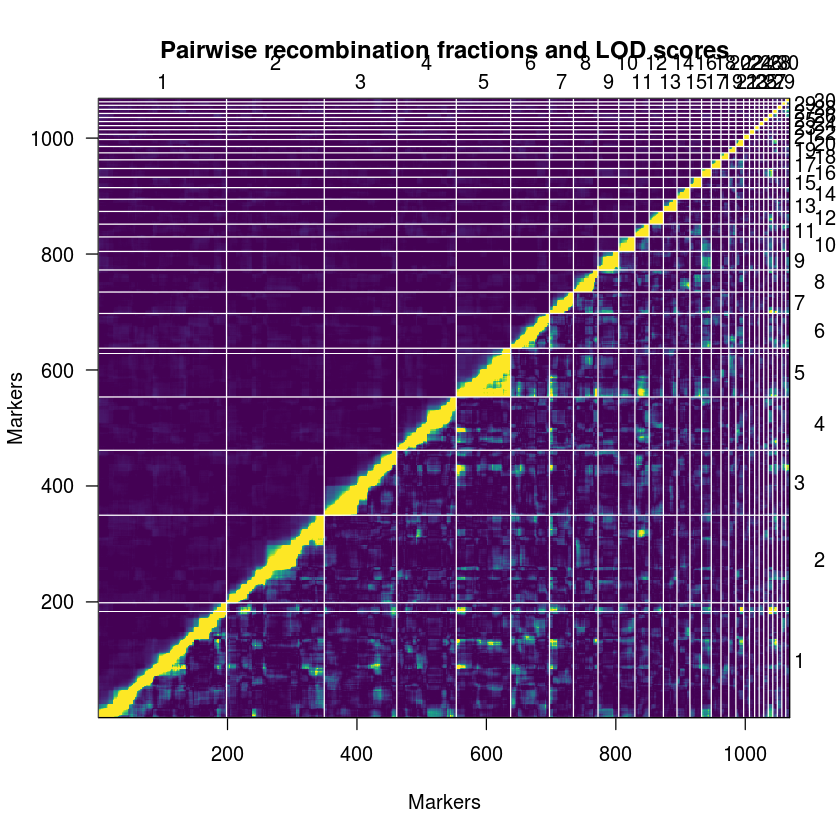

In [32]:
plotRF(datf2.4, alternate.chrid=TRUE)

In [33]:
genmap <- est.map(datf2.4, error.prob=0.005)

Warning message in est.map(datf2.4, error.prob = 0.005):
“Didn't converge!”

In [34]:
summaryMap(genmap)

,n.mar,length,ave.spacing,max.spacing
1,198,481.1137406,2.44220173,19.2990060
2,151,334.3058355,2.22870557,19.5264659
3,112,213.9480383,1.92745980,16.2662968
4,92,237.2403792,2.60703713,17.9947798
5,84,172.0738347,2.07317873,19.5728807
6,60,145.6763288,2.46909032,11.1508786
7,37,87.8682279,2.44078411,14.0260439
8,38,91.1674472,2.46398506,16.9009229
9,32,55.9020137,1.80329077,22.9872979
10,25,27.5304723,1.14710301,7.4385589


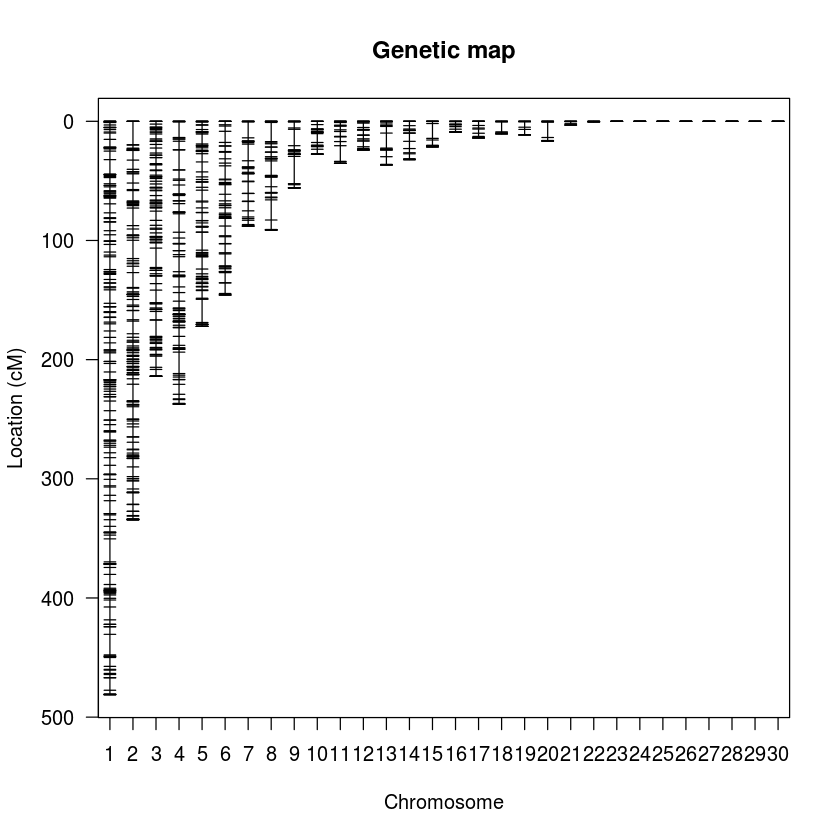

In [35]:
plotMap(genmap)

In [36]:
datf2.4 <- replace.map(datf2.4, genmap)

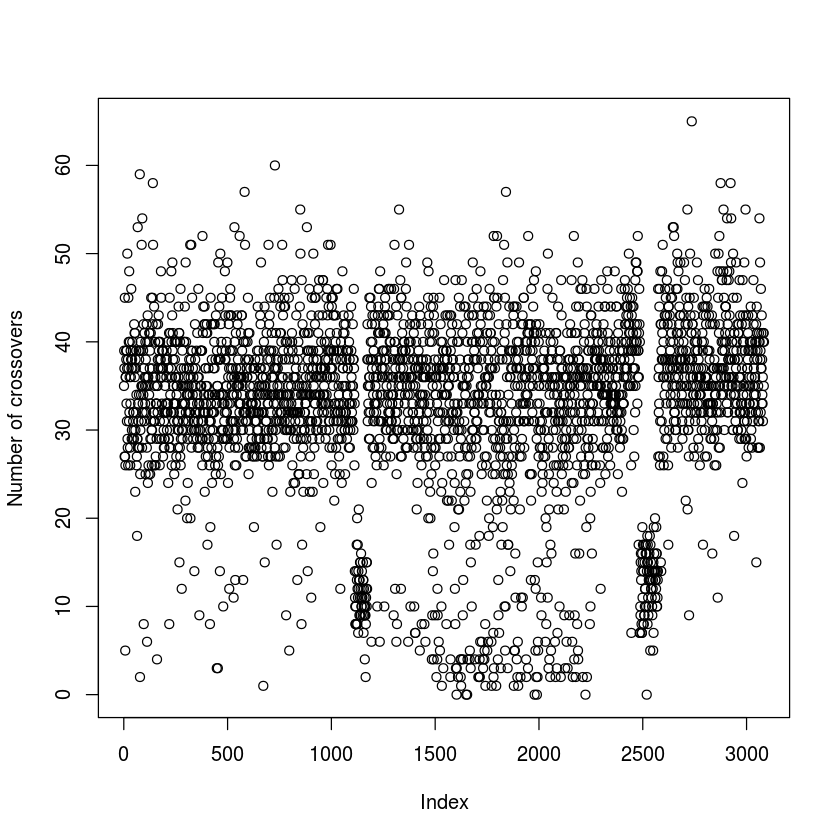

[1] 32.58139

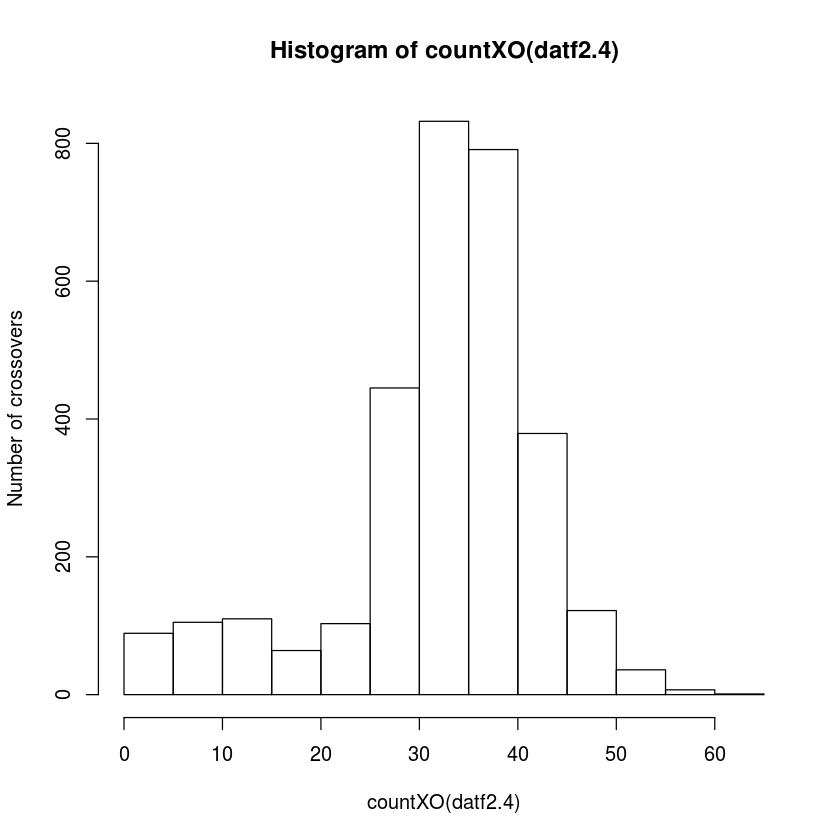

In [37]:
plot(countXO(datf2.4), ylab="Number of crossovers")
hist(countXO(datf2.4), ylab="Number of crossovers")
mean(countXO(datf2.4), ylab="Number of crossovers")


In [38]:
datf2.5 <- datf2.4

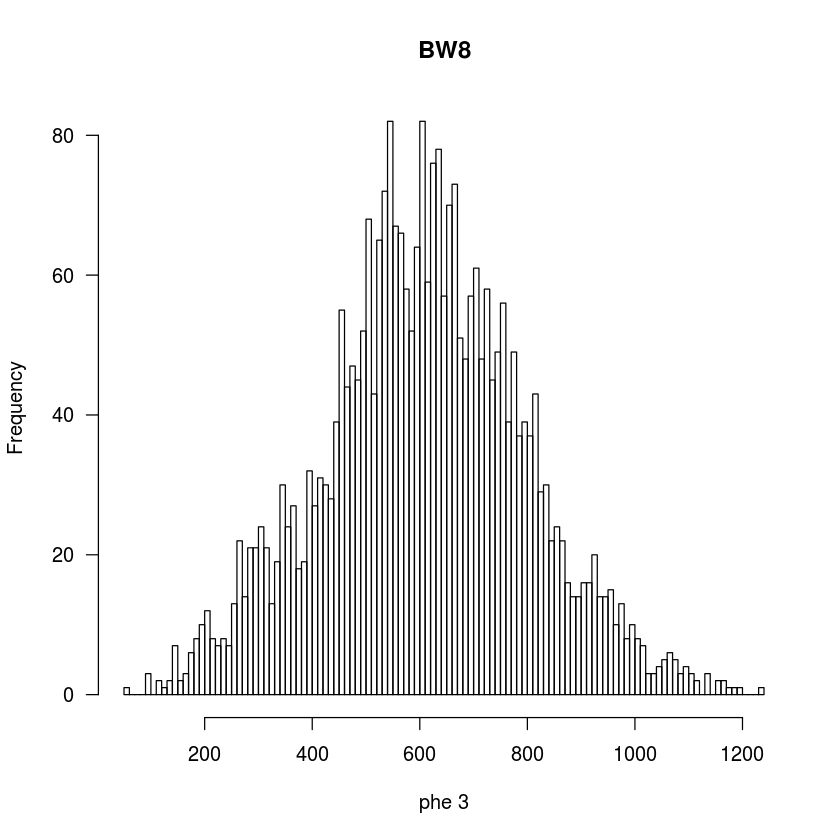

In [39]:
plotPheno(datf2.5, pheno.col=3)

In [ ]:
#plotMissing(datf2.5, reorder=TRUE)

In [48]:
datf2.5 <- calc.genoprob(datf2.5, step=1)

In [49]:
datf2.5 <- calc.genoprob(datf2.5, step=0, off.end = 0)


In [50]:
out.em <- scanone(datf2.5, pheno.col = 3)

Warning message in checkcovar(cross, pheno.col, addcovar, intcovar, perm.strata, :
“Dropping 61 individuals with missing phenotypes.
”

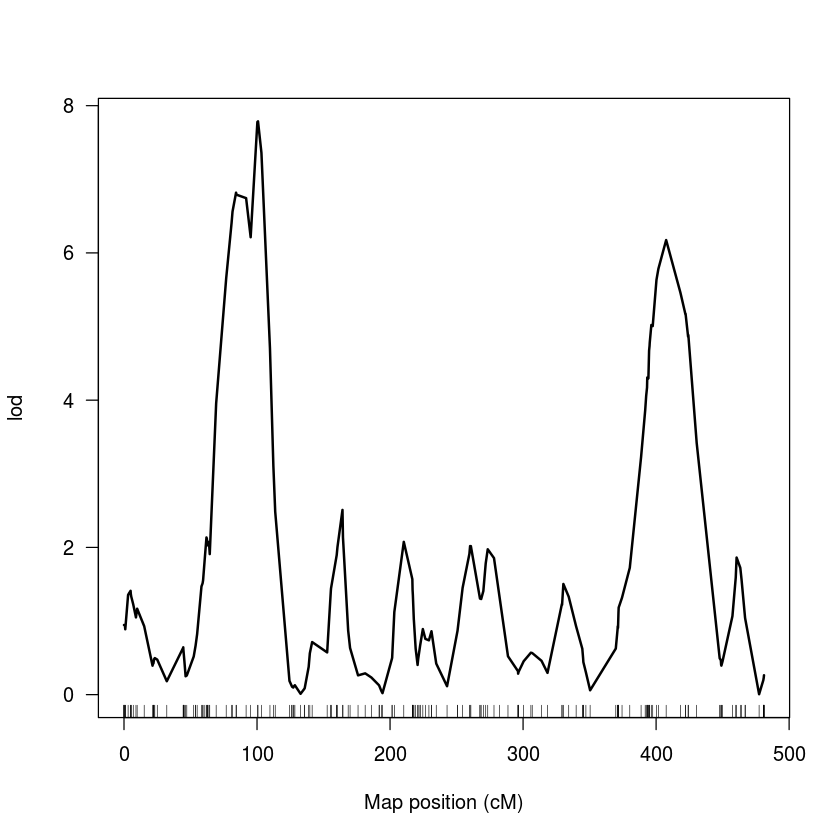

In [51]:
plot(out.em, chr=1)

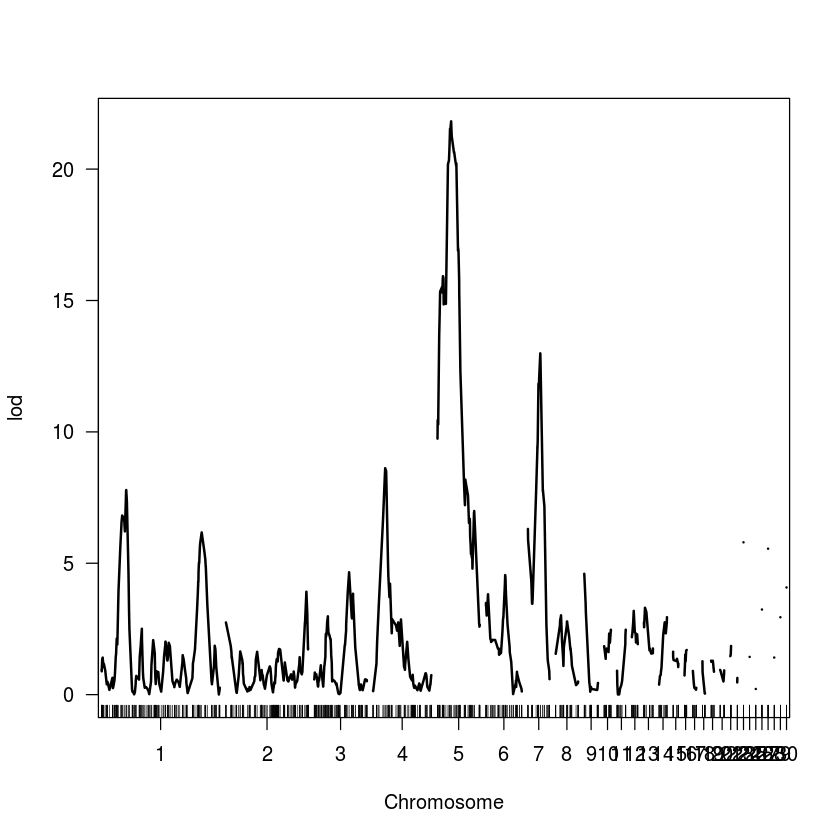

In [52]:
plot(out.em)

In [67]:
ac <- pull.pheno(datf2.5, c("SEX"))

In [63]:
ac2 <- pull.pheno(datf2.5, c("SEX","GENERATION"))

In [ ]:
ac3 <- pull.pheno(datf2.5, c("SEX","GENERATION","DAM"))

In [54]:
out.acovar <- scanone(datf2.5, pheno.col = 3, addcovar=ac2)

Warning message in checkcovar(cross, pheno.col, addcovar, intcovar, perm.strata, :
“Dropping 61 individuals with missing phenotypes.
”

In [68]:
out.acovar2 <- scanone(datf2.5, pheno.col = 3, addcovar=ac)

Warning message in checkcovar(cross, pheno.col, addcovar, intcovar, perm.strata, :
“Dropping 61 individuals with missing phenotypes.
”

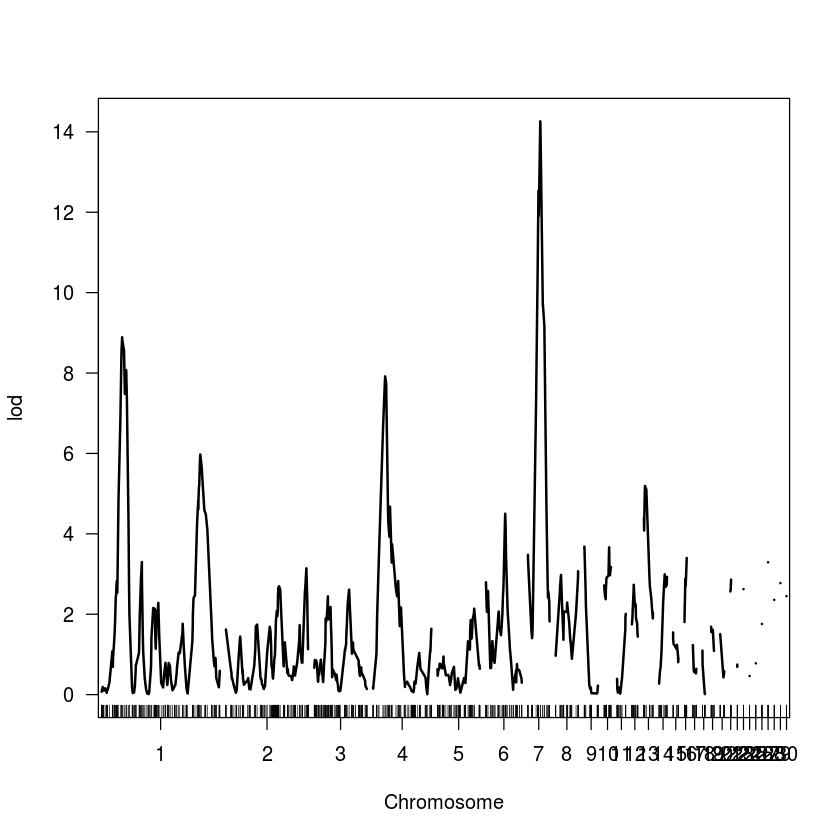

In [56]:
plot(out.acovar)

In [ ]:
plot(out.acovar2, chr=1)

In [ ]:
plot(out.acovar, chr=1)

In [ ]:
out.acovar2

In [57]:
write.csv(out.acovar, "20200729_out_all_nodensfilter_xo3mb_fill_3mb_wscomposite_bs1e6_res10kb_em_bw8_ctrlsex_ctrlgen.csv")

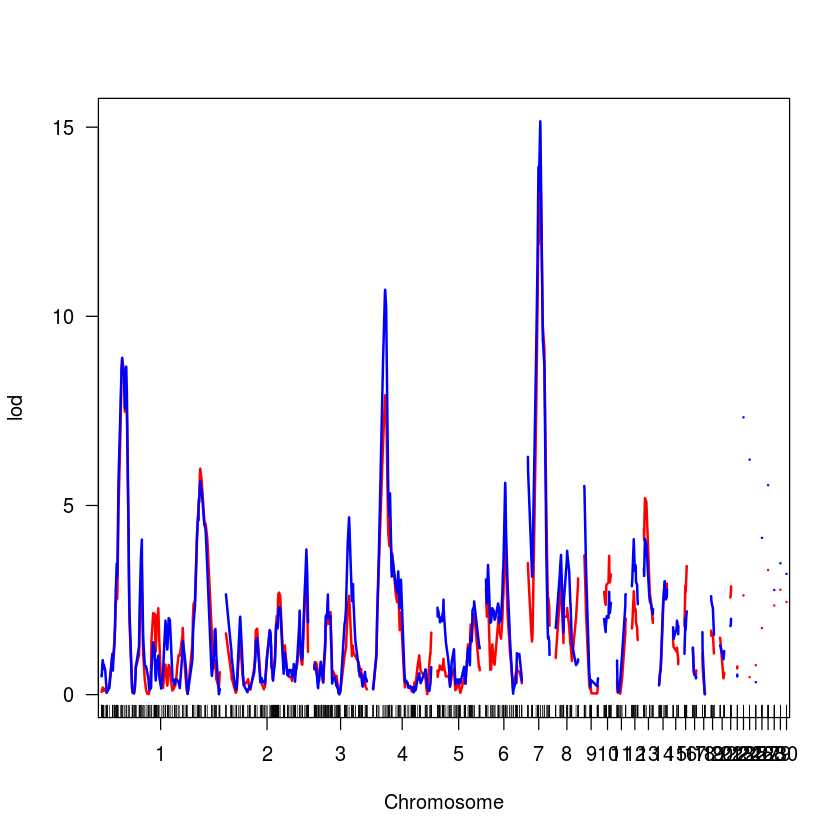

In [79]:
plot(out.acovar, out.acovar2, col = c('red','blue'))

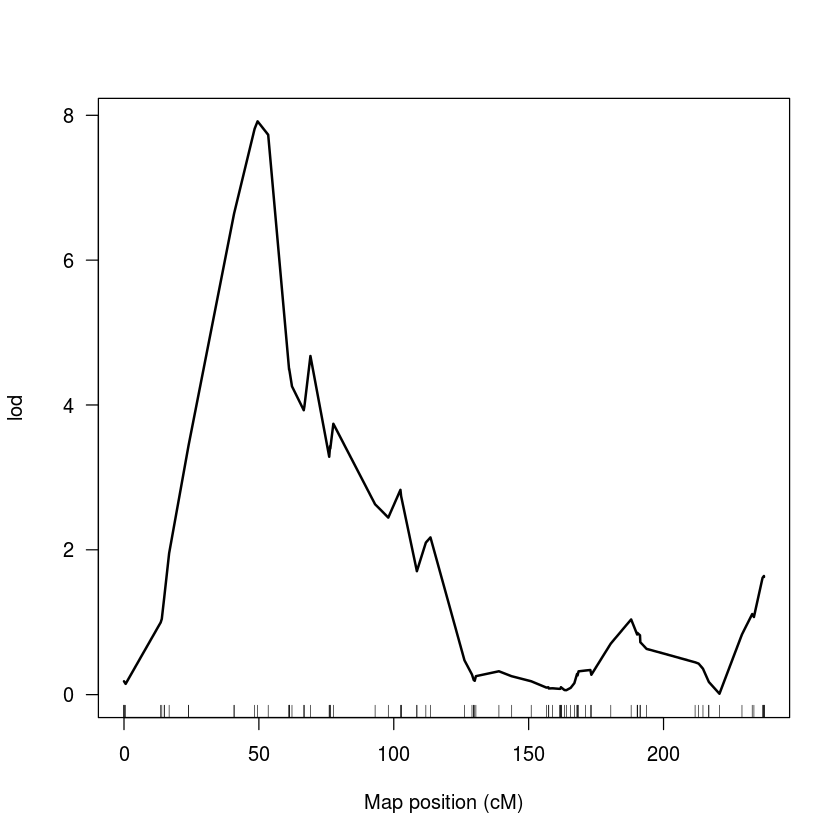

In [82]:
plot(out.acovar, chr = 4)

In [83]:
out.acovar_2d <- scantwo(datf2.5, pheno.col = 3, addcovar=ac2)

Warning message in checkcovar(cross, pheno.col, addcovar, intcovar, perm.strata, :
“Dropping 61 individuals with missing phenotypes.
”

 --Running scanone
 --Running scantwo
 (1,1)
 (1,2)
 (1,3)
 (1,4)
 (1,5)
 (1,6)
 (1,7)
 (1,8)
 (1,9)
 (1,10)
 (1,11)
 (1,12)
 (1,13)
 (1,14)
 (1,15)
 (1,16)
 (1,17)
 (1,18)
 (1,19)
 (1,20)
 (1,21)
 (1,22)
 (1,23)
 (1,24)
 (1,25)
 (1,26)
 (1,27)
 (1,28)
 (1,29)
 (1,30)
 (2,2)
 (2,3)
 (2,4)
 (2,5)
 (2,6)
 (2,7)
 (2,8)
 (2,9)
 (2,10)
 (2,11)
 (2,12)
 (2,13)
 (2,14)
 (2,15)
 (2,16)
 (2,17)
 (2,18)
 (2,19)
 (2,20)
 (2,21)
 (2,22)
 (2,23)
 (2,24)
 (2,25)
 (2,26)
 (2,27)
 (2,28)
 (2,29)
 (2,30)
 (3,3)
 (3,4)
 (3,5)
 (3,6)
 (3,7)
 (3,8)
 (3,9)
 (3,10)
 (3,11)
 (3,12)
 (3,13)
 (3,14)
 (3,15)
 (3,16)
 (3,17)
 (3,18)
 (3,19)
 (3,20)
 (3,21)
 (3,22)
 (3,23)
 (3,24)
 (3,25)
 (3,26)
 (3,27)
 (3,28)
 (3,29)
 (3,30)
 (4,4)
 (4,5)
 (4,6)
 (4,7)
 (4,8)
 (4,9)
 (4,10)
 (4,11)
 (4,12)
 (4,13)
 (4,14)
 (4,15)
 (4,16)
 (4,17)
 (4,18)
 (4,19)
 (4,20)
 (4,21)
 (4,22)
 (4,23)
 (4,24)
 (4,25)
 (4,26)
 (4,27)
 (4,28)
 (4,29)
 (4,30)
 (5,5)
 (5,6)
 (5,7)
 (5,8)
 (5,9)
 (5,10)
 (5,11)
 (5,12)
 (5,13)
 (5,14)
 (5,1

Warning message in plot.scantwo(out.acovar_2d):
“1076 LOD scores NA, set to 0”Warning message in plot.scantwo(out.acovar_2d):
“6 LOD scores <0, set to 0”

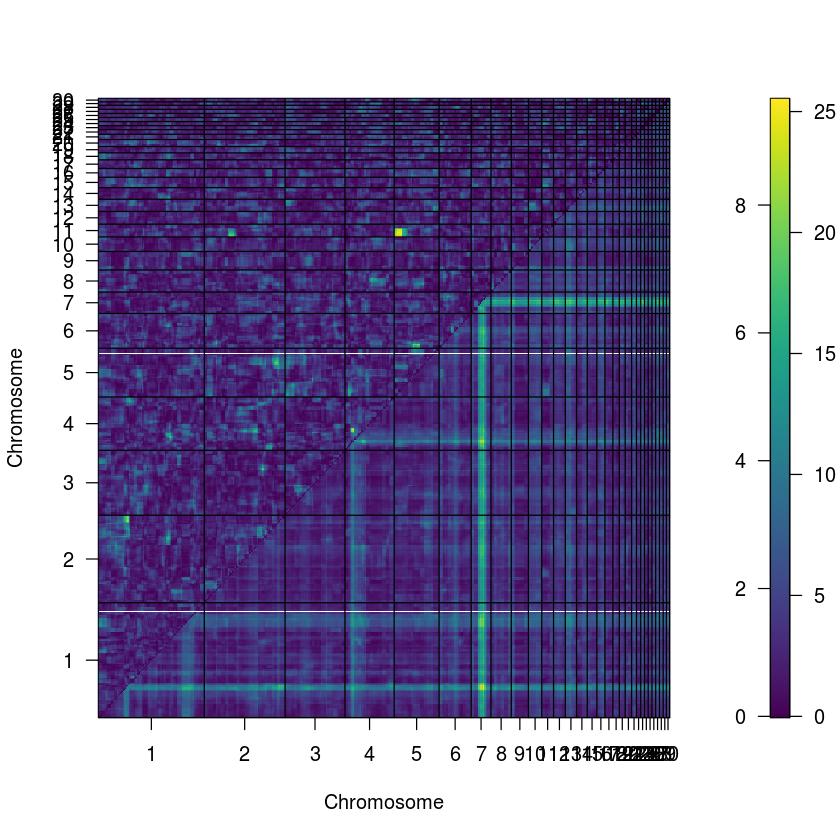

In [32]:
plot(out.acovar_2d)

In [85]:
save.image(file = "20200730_nodens.Rdata")

In [ ]:
subset(datf2.5

In [86]:
strEndsWith <- function(haystack, needle)
{
  hl <- nchar(haystack)
  nl <- nchar(needle)
  if(nl>hl)
  {
    return(F)
  } else
  {
    return(substr(haystack, hl-nl+1, hl) == needle)
  }
}

In [6]:
F2 = datf2.5$pheno['GENERATION'] ==2
F3 = datf2.5$pheno['GENERATION'] ==3
F4 = datf2.5$pheno['GENERATION'] ==4
F5 = datf2.5$pheno['GENERATION'] ==5
F6 = datf2.5$pheno['GENERATION'] ==6
F7 = datf2.5$pheno['GENERATION'] ==7
F8 = datf2.5$pheno['GENERATION'] ==8
F9 = datf2.5$pheno['GENERATION'] ==9
F10 = datf2.5$pheno['GENERATION'] ==10
F11 = datf2.5$pheno['GENERATION'] ==11
F13 = datf2.5$pheno['GENERATION'] ==13
F14 = datf2.5$pheno['GENERATION'] ==14
F15 = datf2.5$pheno['GENERATION'] ==15

In [11]:
F2subs = subset(datf2.5, ind = F2)
F8subs = subset(datf2.5, ind = F8)
F15subs = subset(datf2.5, ind = F15)

In [10]:
acF8 <- pull.pheno(F8subs, c("SEX"))
acF2 <- pull.pheno(F2subs, c("SEX"))
acF15 <- pull.pheno(F15subs, c("SEX"))

In [12]:
out.acovar.F8 <- scanone(F8subs, pheno.col = 3, addcovar=acF8)
out.acovar.F2 <- scanone(F2subs, pheno.col = 3, addcovar=acF2)
out.acovar.F15 <- scanone(F15subs, pheno.col = 3, addcovar=acF15)

Warning message in checkcovar(cross, pheno.col, addcovar, intcovar, perm.strata, :
“Dropping 3 individuals with missing phenotypes.
”Warning message in checkcovar(cross, pheno.col, addcovar, intcovar, perm.strata, :
“Dropping 54 individuals with missing phenotypes.
”

In [17]:
F3subs = subset(datf2.5, ind = F3)
F4subs = subset(datf2.5, ind = F4)
F5subs = subset(datf2.5, ind = F5)

In [18]:
acF3 <- pull.pheno(F3subs, c("SEX"))
acF4 <- pull.pheno(F4subs, c("SEX"))
acF5 <- pull.pheno(F5subs, c("SEX"))

In [19]:
out.acovar.F3 <- scanone(F3subs, pheno.col = 3, addcovar=acF3)
out.acovar.F4 <- scanone(F4subs, pheno.col = 3, addcovar=acF4)
out.acovar.F5 <- scanone(F5subs, pheno.col = 3, addcovar=acF5)

Warning message in checkcovar(cross, pheno.col, addcovar, intcovar, perm.strata, :
“Dropping 2 individuals with missing phenotypes.
”

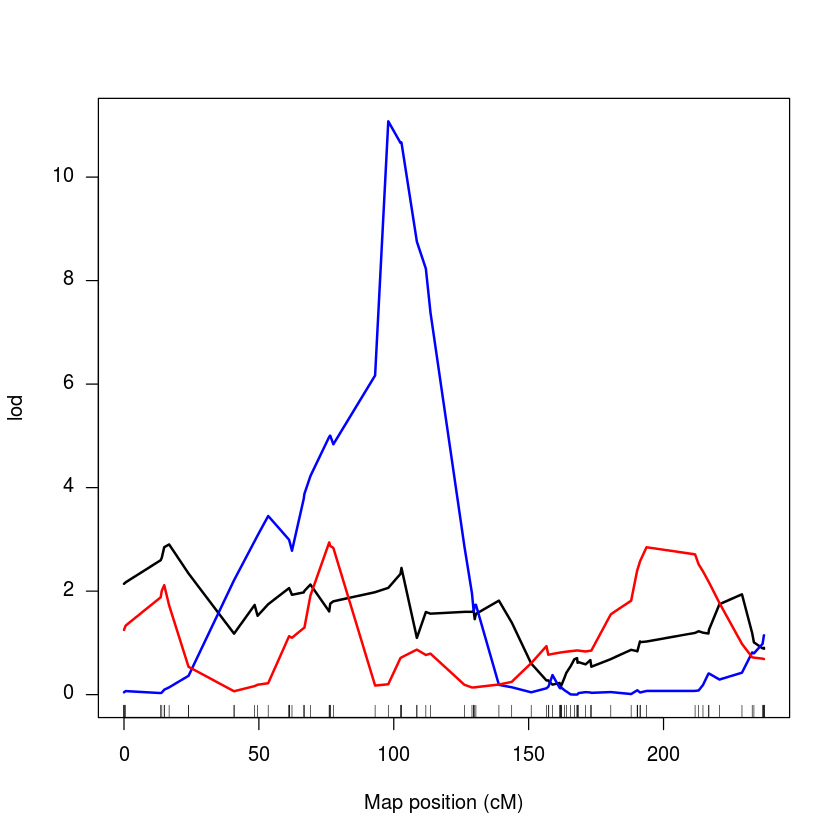

In [31]:
plot(out.acovar.F2,out.acovar.F3,out.acovar.F8, chr=4)

In [1]:
load("20200730_nodens.Rdata")

In [ ]:
out